In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
%%bash

head -20 ../avida_files/complex/data_complex/dominant.dat

# Avida Dominant Data
# Tue Sep  6 12:18:56 2016
#  1: Update
#  2: Average Merit of the Dominant Genotype
#  3: Average Gestation Time of the Dominant Genotype
#  4: Average Fitness of the Dominant Genotype
#  5: Repro Rate?
#  6: Size of Dominant Genotype
#  7: Copied Size of Dominant Genotype
#  8: Executed Size of Dominant Genotype
#  9: Abundance of Dominant Genotype
# 10: Number of Births
# 11: Number of Dominant Breed True?
# 12: Dominant Gene Depth
# 13: Dominant Breed In
# 14: Max Fitness?
# 15: Genotype ID of Dominant Genotype
# 16: Name of the Dominant Genotype

0 0 0 0 0 100 0 0 1 0 0 0 0 2.22507e-308 1 100-aaaaa 


In [53]:
columns = ['update','merit','gestation_time','fitness','repro_rate',
           '(deprecated)_size','copied_size','executed_size',
           '(deprecated)_abundance','proportion_of_organisms_that_gave_birth_in_this_update',
           'proportion_of_breed_true_organisms','(deprecated)_genotype_depth',
           'generation','neutral_metric','lineage_label',
           'true_replication_rate_(based_on_births/update_time-averaged)','']

df_average = pd.read_table('../avida_files/complex/data_complex/average.dat',
                           delimiter=' ', skiprows=19, header=None)

df_average.columns = columns
df_average = df_average.dropna(axis=1)

df_average.head()

,update,merit,gestation_time,fitness,repro_rate,(deprecated)_size,copied_size,executed_size,(deprecated)_abundance,proportion_of_organisms_that_gave_birth_in_this_update,proportion_of_breed_true_organisms,(deprecated)_genotype_depth,generation,neutral_metric,lineage_label,true_replication_rate_(based_on_births/update_time-averaged)
0,0,97.0000,389.000,0.000000,0,0,100.000,97.0000,0,1.000000,1.000000,0,0.00000,0.00000,0,0
1,100,96.8056,388.375,0.249247,0,0,100.028,96.8056,0,0.000000,0.000000,0,6.94444,1.57105,0,0
2,200,96.8764,391.684,0.247392,0,0,101.031,97.0905,0,0.011038,0.008830,0,14.88740,2.68282,0,0
3,300,98.9711,399.659,0.247510,0,0,103.399,98.9805,0,0.056075,0.034834,0,22.67800,3.14164,0,0
4,400,101.2000,410.263,0.247136,0,0,106.023,101.5190,0,0.041725,0.024571,0,29.97400,3.46001,0,0


In [57]:
columns = ['update','not','nand','and','ornot','or','andnot','nor','xor','equals','']

df_tasks = pd.read_table('../avida_files/complex/data_complex/tasks.dat',
                         delimiter=' ', skiprows=15, header=None)

df_tasks.columns = columns
df_tasks = df_tasks.dropna(axis=1)

df_tasks.tail()

,update,not,nand,and,ornot,or,andnot,nor,xor,equals
95,9500,3495,3215,3306,3466,3468,38,3413,0,0
96,9600,3488,3452,3324,3486,3473,36,3450,0,0
97,9700,3529,3526,3328,3474,3464,34,3447,0,0
98,9800,3475,3494,3334,3464,3464,28,3436,0,0
99,9900,3504,3543,3304,3441,3446,36,3431,0,0


In [58]:
columns = ['update','average_merit','average_gestation_time',
           'average fitness','repro_rate','size','copied_size',
           'executed_size','abundance','number_of_births',
           'number_of_dominant_breed','dominant_gene_depth',
           'dominant_breed_in','max_fitness','genotype_ID','name','']

df_dominant = pd.read_table('../avida_files/complex/data_complex/dominant.dat',
                            delimiter=' ', skiprows=19, header=None)

df_dominant.columns = columns
df_dominant = df_dominant.dropna(axis=1)

df_dominant.head()

,update,average_merit,average_gestation_time,average fitness,repro_rate,size,copied_size,executed_size,abundance,number_of_births,number_of_dominant_breed,dominant_gene_depth,dominant_breed_in,max_fitness,genotype_ID,name
0,0,0,0,0.000000,0.000000,100,0.0000,0,1,0,0,0,0,2.225070e-308,1,100-aaaaa
1,100,97,389,0.249357,0.002571,100,100.0000,0,33,0,0,0,0,2.493570e-01,1,100-aaaaa
2,200,97,389,0.249357,0.002571,100,100.0000,0,26,0,0,0,0,2.493570e-01,1,100-aaaaa
3,300,96,385,0.249351,0.002597,99,99.1882,0,16,0,0,1,0,2.493510e-01,209,099-aaaan
4,400,97,386,0.251295,0.002591,100,100.0000,0,23,0,0,5,0,2.512950e-01,1173,100-aaack


In [48]:
sns.set_style('whitegrid')

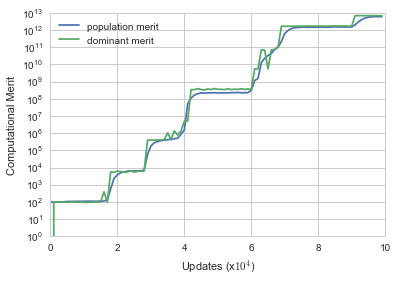

In [105]:
fig, ax = plt.subplots(1,1)

ax.plot(df_average['update'], df_average['merit'], label='population merit')
ax.plot(df_average['update'], df_dominant['average_merit'], label='dominant merit')

ax.set_yscale('log', basey=10)

ax.set_xlim(0,10000)
ax.set_ylim(1,10e12)


ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^4$)')
ax.set_ylabel('Computational Merit')

ax.legend(loc='best');

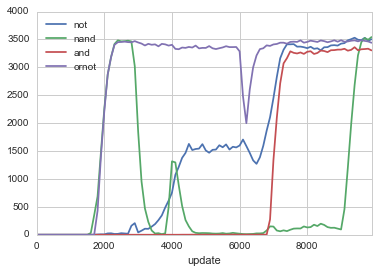

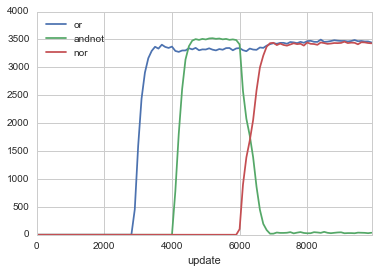

In [106]:
df_tasks.plot('update', ['not','nand','and','ornot'])
df_tasks.plot('update', ['or','andnot','nor'])

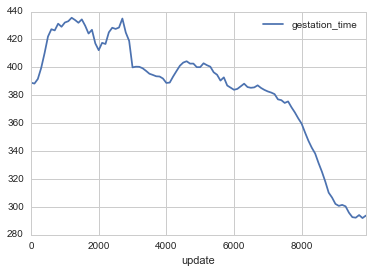

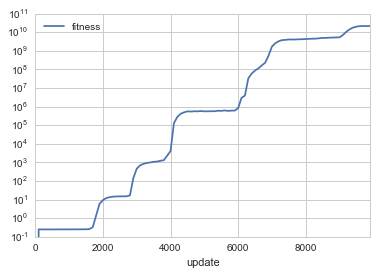

In [107]:
df_average.plot('update', 'gestation_time')
df_average.plot('update', 'fitness', logy=True)

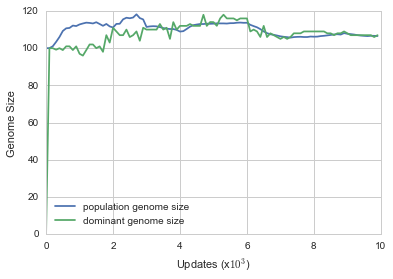

In [117]:
fig, ax = plt.subplots(1,1)

ax.plot(df_average['update'], df_average['copied_size'], label='population genome size')
ax.plot(df_average['update'], df_dominant['copied_size'], label='dominant genome size')

ax.set_xticklabels(list(range(0,11,2)))

ax.set_xlabel('Updates (x$10^3$)')
ax.set_ylabel('Genome Size')

ax.legend(loc='best');